# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [25]:
# domgross is the outcome variable
X = pd_df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = pd_df['domgross']

In [26]:
#Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Fit a regression model to the training data and look at the coefficients

In [27]:
# Your code 
from sklearn.linear_model import *
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lm.coef_

array([ 0.51183714, -0.67463558,  0.85632302,  0.33286609])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

Text(0.5,1,'Test data')

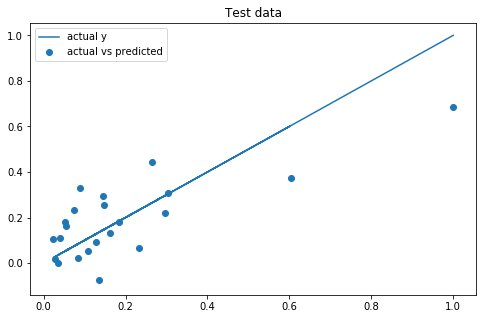

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here
plt.figure(figsize=(8,5))
plt.plot(y_train, y_train, label = 'actual y')
plt.scatter(y_train, lm.predict(X_train), label='actual vs predicted')
plt.legend()
plt.title('Test data')

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

Text(0.5,1,'Train data')

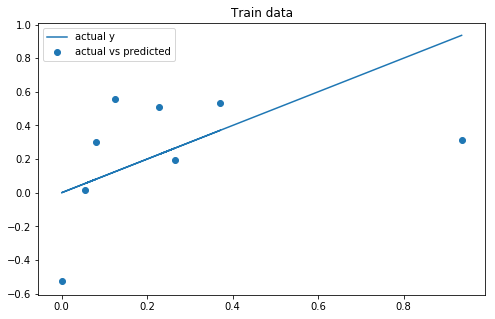

In [32]:
# your code here
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, label = 'actual y')
plt.scatter(y_test, lm.predict(X_test), label='actual vs predicted')
plt.legend()
plt.title('Train data')

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [33]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat-y)

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [34]:
def variance(y_hat):
    return np.mean(y_hat**2)-np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [35]:
# code for train set bias and variance
y_hat = lm.predict(X_train)
b = bias(y_train, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)
# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

Bias:  1.261617073437678e-16
Variance:  0.028050156498896694


In [36]:
# code for test set bias and variance
y_hat = lm.predict(X_test)
b = bias(y_test, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)
# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

Bias:  0.019665953762799504
Variance:  0.11266797970294692


## Describe in words what these numbers can tell you.

In [ ]:
# Your description here

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
np.shape(poly_X_train)
# your code here

(22, 35)

## Plot your overfitted model's training predictions against the actual data

Text(0.5,1,'Train data')

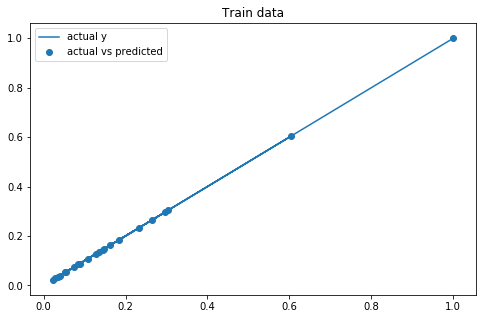

In [47]:
# your code here
lm2 = LinearRegression().fit(poly_X_train, y_train)
plt.figure(figsize=(8,5))
plt.plot(y_train, y_train, label = 'actual y')
plt.scatter(y_train, lm2.predict(poly_X_train), label='actual vs predicted')
plt.legend()
plt.title('Train data')


Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [48]:
# your code here
y_hat = lm2.predict(poly_X_train)
b = bias(y_train, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)
# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

Bias:  -7.326841153989315e-16
Variance:  0.04768297308540539


## Plot your overfitted model's test predictions against the actual data.

Text(0.5,1,'Test data')

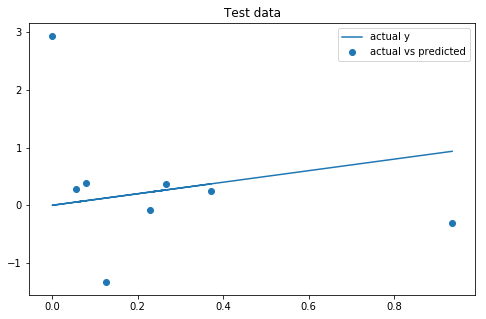

In [49]:
# your code here
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, label = 'actual y')
plt.scatter(y_test, lm2.predict(poly_X_test), label='actual vs predicted')
plt.legend()
plt.title('Test data')

##  Calculate the bias and variance for the test set.

In [44]:
# your code here
y_hat = lm2.predict(poly_X_test)
b = bias(y_test, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

Bias:  -0.053001846388698814
Variance:  1.2658580202094079


## Describe what you notice about the bias and variance statistics for your overfit model

In [46]:
# Your description here
#higher variance and bias, looks like overfitting

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

In [51]:
poly = PolynomialFeatures(2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
np.shape(poly_X_train)

(22, 15)

Text(0.5,1,'Train data')

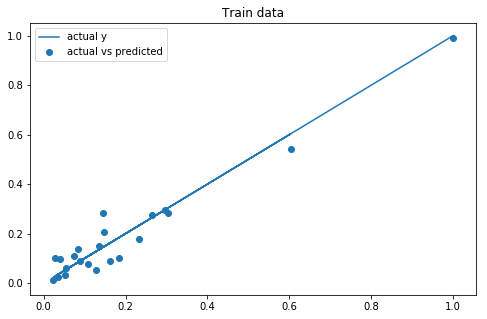

In [53]:
lm3 = LinearRegression().fit(poly_X_train, y_train)
plt.figure(figsize=(8,5))
plt.plot(y_train, y_train, label = 'actual y')
plt.scatter(y_train, lm3.predict(poly_X_train), label='actual vs predicted')
plt.legend()
plt.title('Train data')

In [54]:
y_hat = lm3.predict(poly_X_train)
b = bias(y_train, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)

Bias:  -5.702509171938304e-16
Variance:  0.04483801326392098


Text(0.5,1,'Test data')

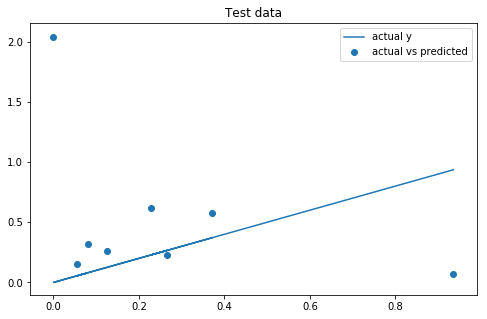

In [55]:
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, label = 'actual y')
plt.scatter(y_test, lm3.predict(poly_X_test), label='actual vs predicted')
plt.legend()
plt.title('Test data')

In [56]:
y_hat = lm3.predict(poly_X_test)
b = bias(y_test, y_hat)
v = variance(y_hat)
print("Bias: ",b)
print("Variance: ",v)

Bias:  -0.27579510050576733
Variance:  0.3562155244813815


## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 